In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import GradientDescent

In [2]:
data = pd.read_csv('data.csv', header=None)
data

,0,1,2
0,0.780510,-0.063669,1
1,0.287740,0.291390,1
2,0.407140,0.178780,1
3,0.292300,0.421700,1
4,0.509220,0.352560,1
5,0.277850,0.108020,1
6,0.275270,0.332230,1
7,0.439990,0.312450,1
8,0.335570,0.429840,1
9,0.234480,0.249860,1


In [3]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 30, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 30, color = 'red', edgecolor = 'k')

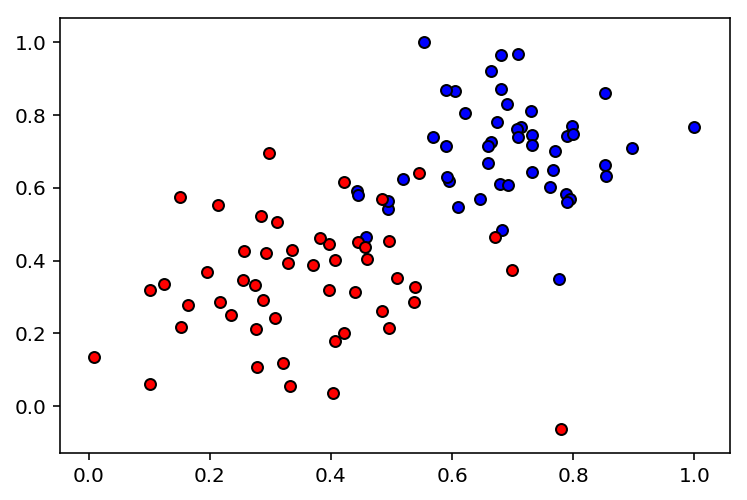

In [4]:
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [5]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

## Training

In [6]:
epochs = 100
learnrate = 0.01


========== Epoch 0 ==========
Train loss:  0.713584519538
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.622583521045
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.554874408367
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.459333464186
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.425255434335
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.397346157167
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.374146976524
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.354599733682
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.337927365888
Accuracy:  0.94


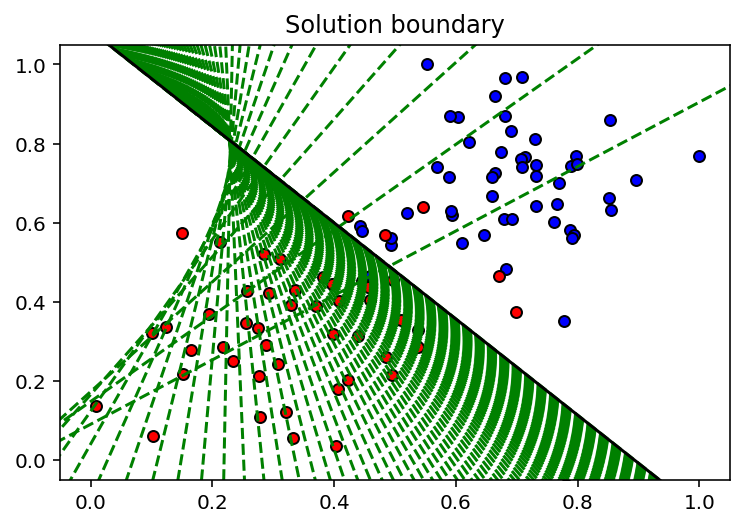

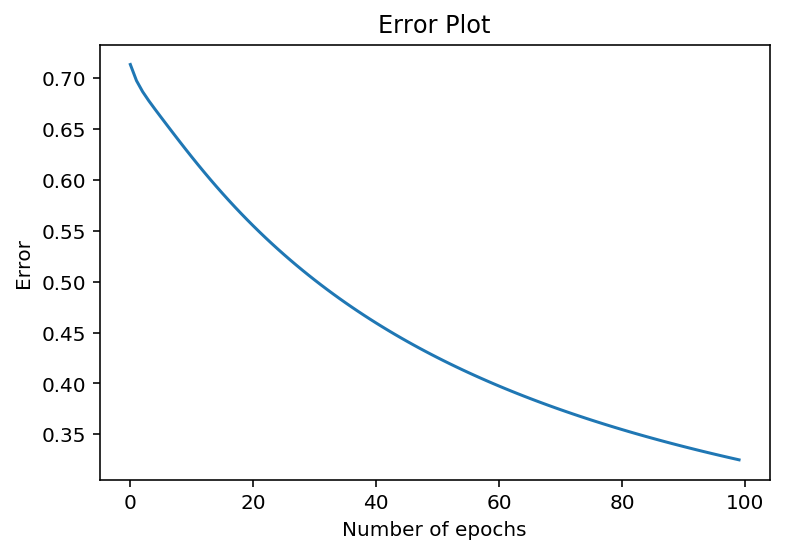

In [7]:
GradientDescent.train(X, y, epochs, learnrate, sigmoid, output_formula, 
                      error_formula, update_weights, True)